Sử dụng PCA giảm số chiều input -> dùng cho mô hình phân loại (Logistic Regression, SoftMax)

# Ví dụ 1.  
Giảm số chiều của bộ dữ liệu hoa Iris (150 mẫu, 3 loại, 4 chiều)  

## Cách 1. Tự gõ tay

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#############################################
# Read csv data file, change to your location 
df = pd.read_csv("data/iris.csv") 

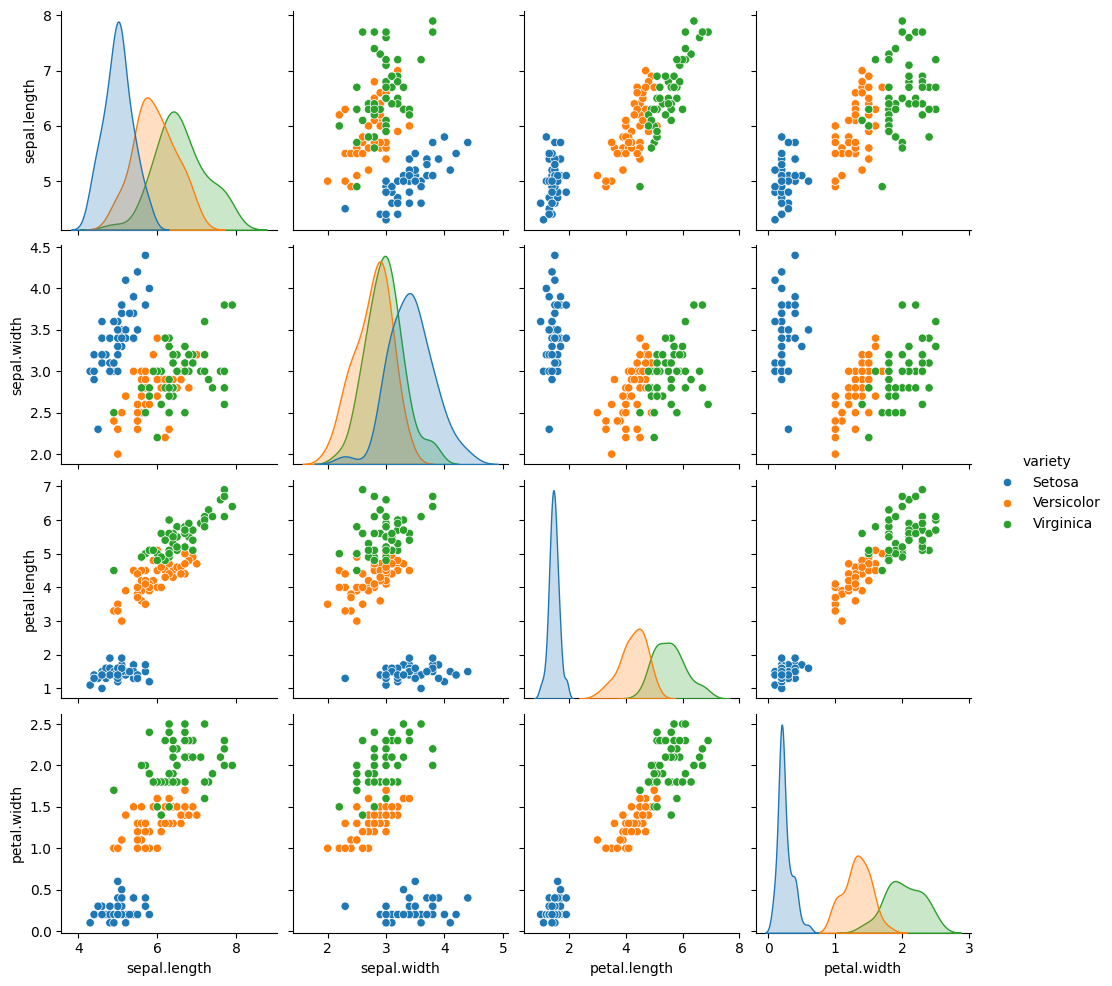

In [3]:
# show data information 
df 
 
df.describe() 
 
sns.pairplot(df, hue = 'variety')   # code thầy sai chính tả làm đọc file bị lỗi

Text(0.5, 1.0, 'Correlation matrix')

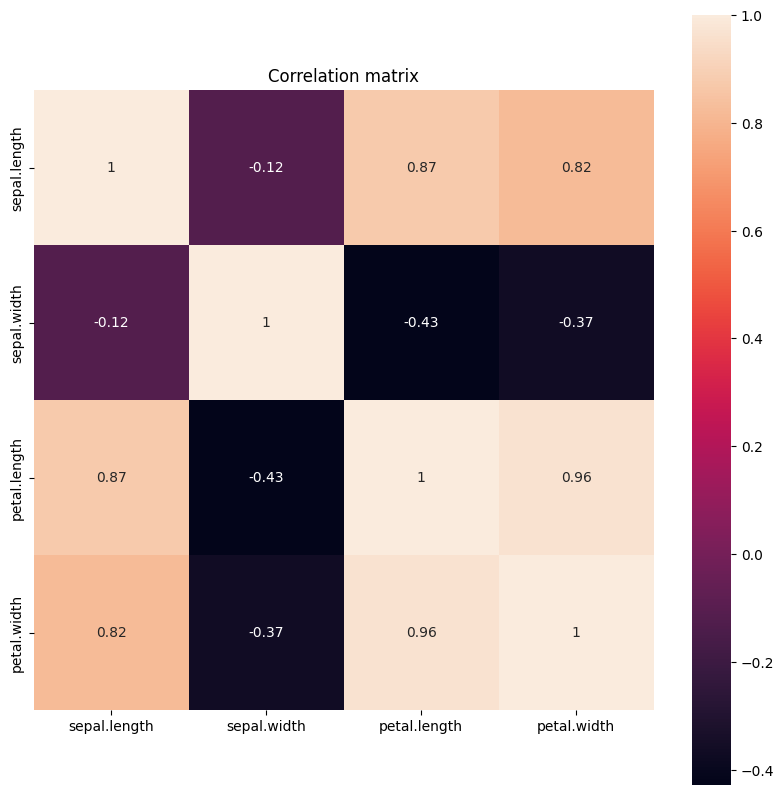

In [12]:
# # We're seperating the species column 
species = df["variety"].tolist() 
X = df.drop("variety", axis=1) # code này của thầy bị sai - phải bổ sung axis= vào
 
# Standardize the data 
X = (X - X.mean()) / X.std(ddof=0) 
 
# Calculating the correlation matrix of the data 
X_corr = (1 / 150) * X.T.dot(X) 
 
# Plotting the correlation matrix 
plt.figure(figsize=(10,10)) 
sns.heatmap(X_corr, vmax=1, square=True,annot=True) 
plt.title('Correlation matrix') 

# Cách vẽ với tham số khác
# # Standardize the data
# X = (df.drop("variety", axis=1) - df.drop("variety", axis=1).mean()) / df.drop("variety", axis=1).std(ddof=0)

# # Calculating the correlation matrix of the data
# X_corr = X.corr()

# # Plotting the correlation matrix
# plt.figure(figsize=(10,10))
# sns.heatmap(X_corr, vmax=1, square=True, annot=True, cmap='coolwarm')
# plt.title('Correlation matrix')
# plt.show()

In [13]:
# method1 
u,s,v = np.linalg.svd(X_corr) 
eig_values, eig_vectors = s, u 
eig_values, eig_vectors 
 
# method2 
np.linalg.eig(X_corr)

EigResult(eigenvalues=array([2.91849782, 0.91403047, 0.14675688, 0.02071484]), eigenvectors=array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

Text(0.5, 0, 'Dimensions')

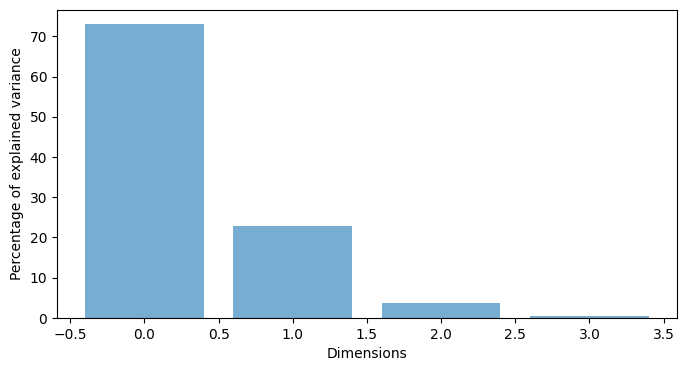

In [14]:
# plotting the variance explained by each PC  
explained_variance=(eig_values / np.sum(eig_values))*100 
plt.figure(figsize=(8,4)) 
plt.bar(range(4), explained_variance, alpha=0.6) 
plt.ylabel('Percentage of explained variance') 
plt.xlabel('Dimensions')

In [15]:
# calculating our new axis 
pc1 = X.dot(eig_vectors[:,0]) 
pc2 = X.dot(eig_vectors[:,1])

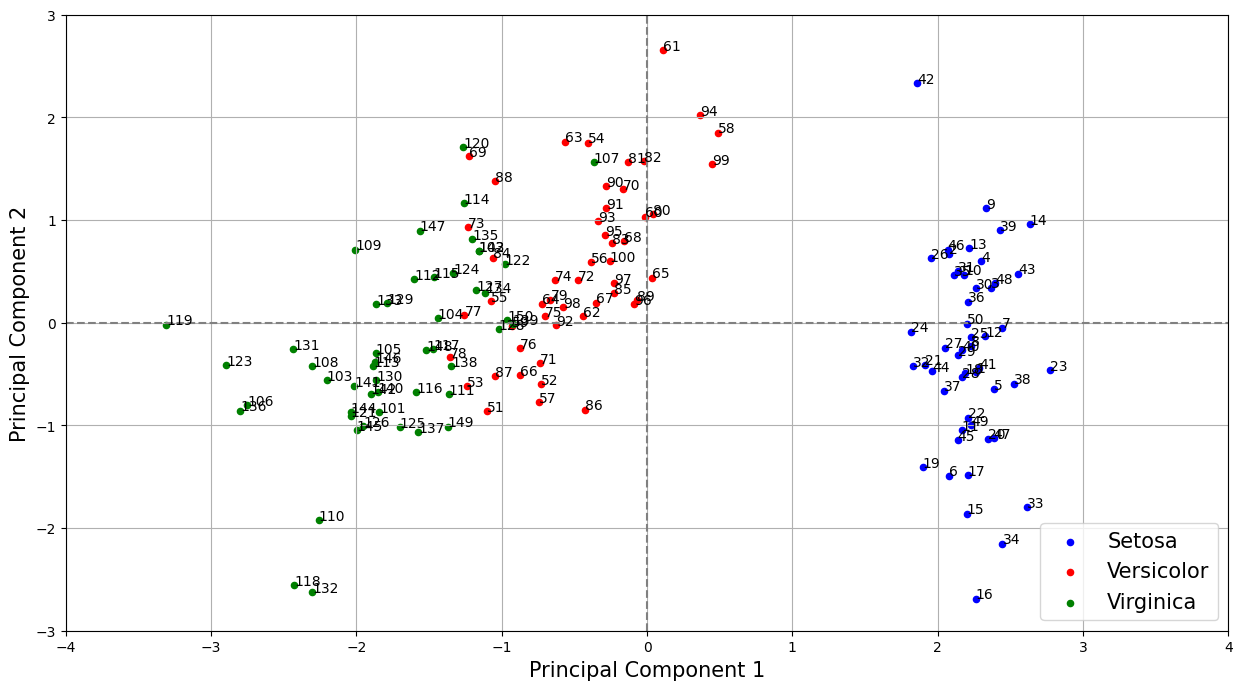

In [16]:
# plotting in 2D
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))

    species_unique = list(set(species))
    species_colors = ["r", "b", "g"]

    for i, spec in enumerate(species):
        plt.scatter(
            pc1[i],
            pc2[i],
            label=spec,
            s=20,
            c=species_colors[species_unique.index(spec)],
        )
        ax.annotate(str(i + 1), (pc1[i], pc2[i]))

    from collections import OrderedDict

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={"size": 15}, loc=4)

    ax.set_xlabel("Principal Component 1", fontsize=15)
    ax.set_ylabel("Principal Component 2", fontsize=15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")

    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()


plot_scatter(pc1, pc2)

## Cách 2. Sử dụng thư viện

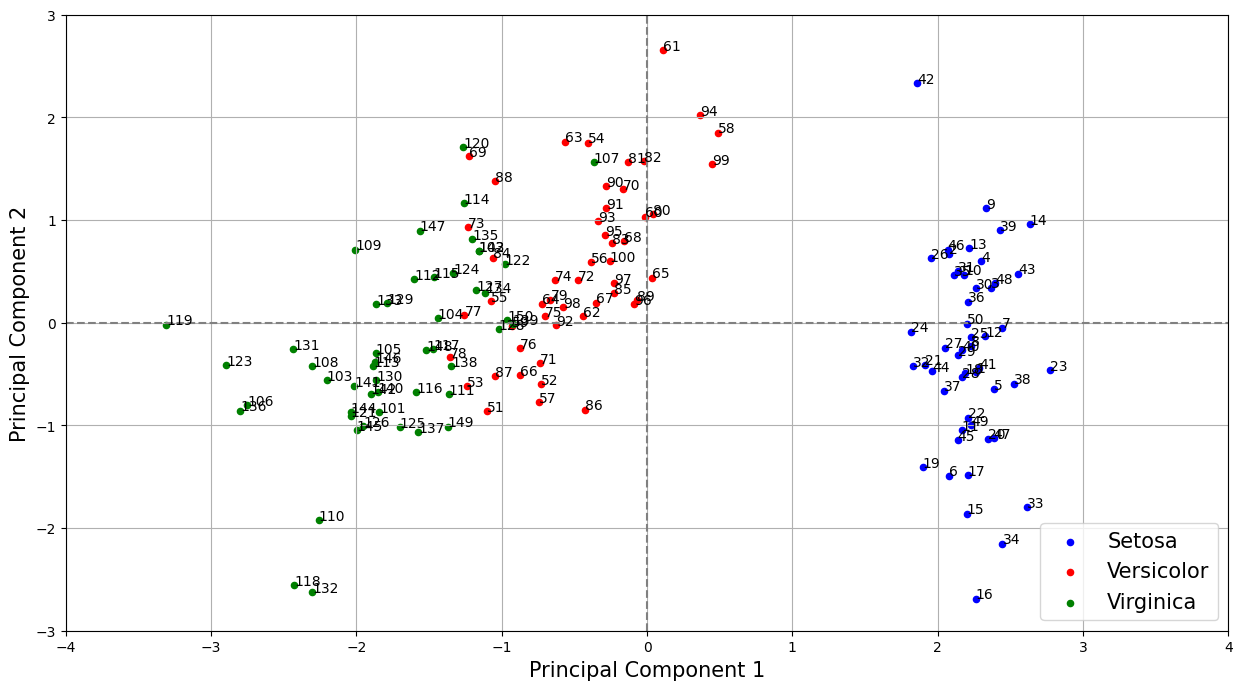

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
 
# Read csv data file, change to your location 
df = pd.read_csv("data/iris.csv") 
 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
 
X = df.drop("variety", axis=1) 
X = StandardScaler().fit_transform(X) 
pca = PCA() 
result = pca.fit_transform(X) 
# Remember what we said about the sign of eigen vectors that might change ? 
pc1 = - result[:,0] 
pc2 = - result[:,1] 
plot_scatter(pc1, pc2)

## Yêu cầu thêm:  

### Sử dụng code ở ví dụ 2 đưa từ 4 chiều về 2 chiều. Hiển thị màn hình quan hệ giữa các lớp dữ liệu  

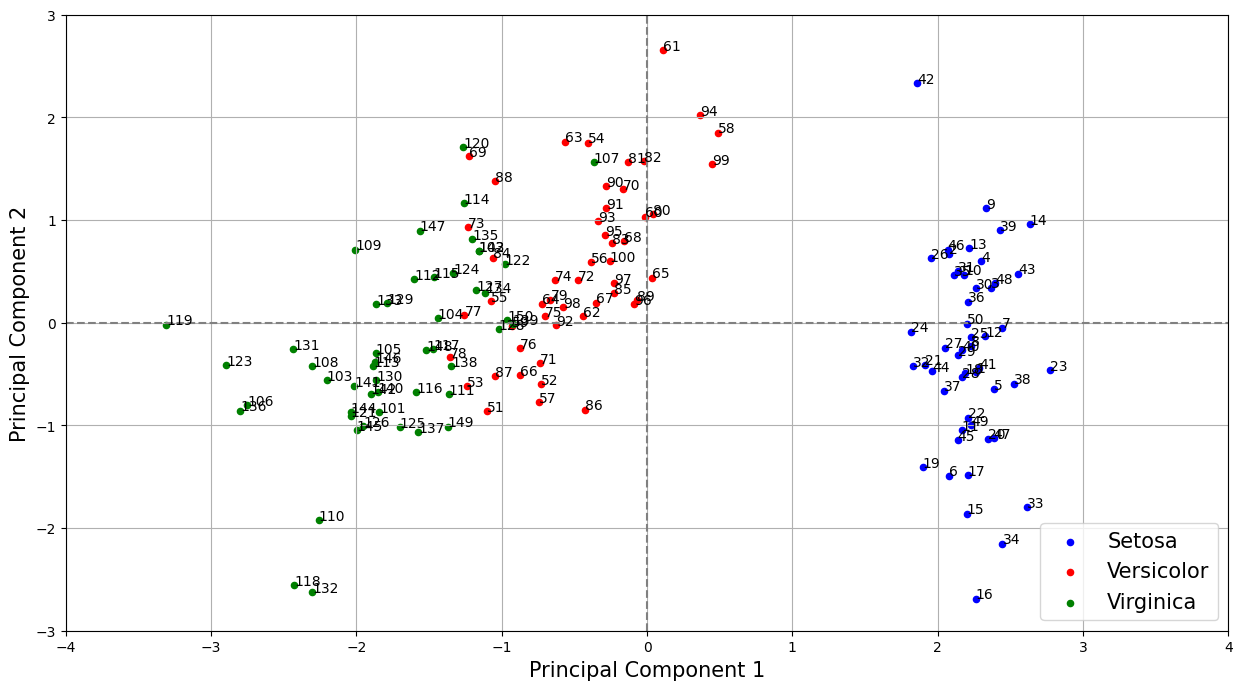

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
 
# Read csv data file, change to your location 
df = pd.read_csv("data/iris.csv") 
 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
 
X = df.drop("variety", axis=1) 
X = StandardScaler().fit_transform(X) 
pca = PCA() 
result = pca.fit_transform(X) 
# Remember what we said about the sign of eigen vectors that might change ? 
pc1 = - result[:,0] 
pc2 = - result[:,1] 
plot_scatter(pc1, pc2)

### Với data đã có, chạy lại thư viện với thư viện linear_model, lớp LogisticRegression và so sánh kết quả.  
Chia Train:Test=4:1 (theo từng loại hoa -> tránh mất cân bằng dữ liệu)

#### Cách 1. Chạy với dữ liệu gốc (không thực hiện giảm số chiều) (nhớ chia train - test set trên đây)

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(conf_matrix)

Accuracy: 0.9666666666666667
Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


#### Cách 2. Chạy với dữ liệu có thực hiện giảm chiều (nhớ chia train - test set trên đây)

##### Cách 2.1. Chia train - test trước rồi thực hiện giảm số chiều trên từng tập

Chia tập train, test trước

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Giảm số chiều trên từng tập. Sau đó thực hiện training với Logistic Regression

In [26]:
from sklearn.decomposition import PCA

# Create a PCA instance
pca = PCA(n_components=2)  # Giảm về 2 chiều

# Fit PCA on training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(conf_matrix)

Accuracy: 0.9
Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]


##### Cách 2.2. Thực hiện giảm số chiều trên toàn tập dataset rồi mới chia train - test set

Load vào bộ dữ liêu

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)


Giảm chiều trên toàn bộ tập dữ liệu

In [28]:
from sklearn.decomposition import PCA

# Create a PCA instance
pca = PCA(n_components=2)  # Giảm về 2 chiều

# Fit PCA on training data and transform both training and testing data
X_pca = pca.fit_transform(X)

Phân chia train - test set

In [29]:
# Split the dataset into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)

Huấn luyện mô hình chạy trên Logistic Regression

In [30]:
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(conf_matrix)

Accuracy: 0.9333333333333333
Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


### Tổng kết.  
1. Thực hiện PCA trên toàn tập dữ liệu trước rồi thực hiện phân chia train - test set sau (cách 2.2) cho accuracy cao hơn so với cách phân chia train - test trước rồi thực hiện PCA sau (cách 2.1). Cụ thể (0.93 > 0.9), lý do là vì thực hiện PCA trên toàn tập dữ liệu trước sẽ cho ta 1 siêu phẳng hình chiếu ít sai số nhất trên toàn tập dữ liệu.  
  
Như vậy, khi muốn sử dụng giảm số chiều thì nên thực hiện giảm số chiều trước rồi mới thực hiện phân chia train - test.  
  
2. So cả 2 cách thực hiện giảm số chiều thì đều cho hiệu suất kém hơn (nhưng không đáng kể - chênh lệch mức 6% với cách 2.1 và 3% với cách 2.2), như vậy PCA có làm mất thông tin và giảm đôi chút hiệu suất nhưng bù lại được ưu điểm giúp tính toán nhanh hơn.  
  
Như vậy, nếu hạ tầng phần cứng cho phép thì có thể không cần giảm số chiều để đạt hiệu suất tốt hơn.  

# Ví dụ 2. (Bài thực hành 1)  
Giảm số chiều bộ dữ liệu bệnh nhân Parkinson

## Tiến hành giảm số chiều về còn 2 chiều và vẽ ra mối quan hệ để quan sát

In [31]:
# Read data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("data/pd_speech_features.csv")

df.head()

df["class"].value_counts()

class
1    564
0    192
Name: count, dtype: int64

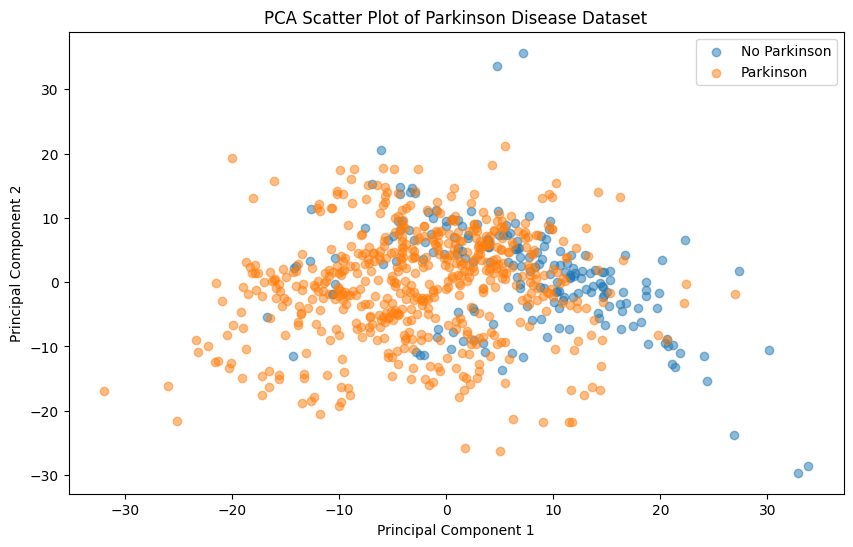

In [33]:
# Tách features và labels
X = df.drop('class', axis=1)
y = df['class']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Giảm số chiều xuống còn 2 chiều
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Tạo DataFrame mới từ dữ liệu giảm chiều
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['class'] = y.values

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_df[pca_df['class'] == 0]['PC1'], pca_df[pca_df['class'] == 0]['PC2'], label='No Parkinson', alpha=0.5)
plt.scatter(pca_df[pca_df['class'] == 1]['PC1'], pca_df[pca_df['class'] == 1]['PC2'], label='Parkinson', alpha=0.5)
plt.title('PCA Scatter Plot of Parkinson Disease Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Giảm xuống 200 chiều (vì như minh họa ở trên giảm xuống 2 chiều thì khó phân loại hiệu quả hơn)  

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv("data/pd_speech_features.csv")

# Tách features và labels
X = df.drop('class', axis=1)
y = df['class']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Giảm số chiều xuống còn 200 chiều
pca = PCA(n_components=200)
X_pca = pca.fit_transform(X_scaled)

# Tách dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, train_size=500, stratify=y, random_state=42)

# Huấn luyện mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8046875


## Sử dụng PCA để đưa về số chiều tối thiểu mà vẫn giữ được lượng thông tin của dữ liệu ít nhất 80%  

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv("data/pd_speech_features.csv")

# Tách features và labels
X = df.drop('class', axis=1)
y = df['class']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Tạo một đối tượng PCA và áp dụng nó để giảm số chiều
pca = PCA(n_components=0.8, svd_solver='full')  # Giữ lại ít nhất 80% lượng thông tin
X_pca = pca.fit_transform(X_scaled)

# Số chiều mới sau khi giảm số chiều
new_dim = pca.n_components_
print("Số chiều mới:", new_dim)

# Tách dữ liệu thành tập train và tập test
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, train_size=500, stratify=y, random_state=42)

# Huấn luyện mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model.predict(X_test_pca)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác với số chiều mới:", accuracy)


Số chiều mới: 61
Độ chính xác với số chiều mới: 0.82421875


Như vậy số chiều mới được chọn là 1 siêu phẳng 61 chiều.  
Qua phép chiều này đảm bảo ít nhất 80% thông tin dữ liệu ban đầu được giữ lại.  
Thực hiện với phân loại tỷ lệ như trên thì thu được độ chính xác của mô hình là 0.82.  

## Sử dụng Naive-Bayes phù hợp or Logistic Regression trên Bộ dữ liệu gốc ban đầu or Bộ dữ liệu đã giảm về 61 chiều ở ý trên  

### Phân chia bộ dữ liệu ban đầu (không giảm chiều) ra train - test set

In [40]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv("data/pd_speech_features.csv")

# Tách features và labels
X = df.drop("class", axis=1)
# X = df.drop("id", axis = 1)   # cột id có vẻ không ảnh hưởng -> bỏ cũng được, không bỏ cũng không khác biệt nhiều

y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, stratify=y, random_state=42
)   # shouldn't set test_size=1/3 vì dễ có khả năng train - test X y size không tương ứng

In [41]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(506, 754) (250, 754) (506,) (250,)


### Naive-Bayes trên Bộ dữ liệu ban đầu (chưa giảm chiều)  
Vì các chỉ số đều là liên tục (trừ id và gender có vẻ giống rời rạc)

Train model

In [44]:
from sklearn.naive_bayes import GaussianNB

# Fit model
model_naive_bayes = GaussianNB(priors=None)
model_naive_bayes.fit(X_train, y_train)

GaussianNB()

Test thử

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model_naive_bayes.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Tính ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.764
Confusion Matrix:
[[ 27  36]
 [ 23 164]]


### Logistic Regression trên Bộ dữ liệu ban đầu (chưa giảm chiều)  

Train model

In [46]:
from sklearn.linear_model import LogisticRegression

# Huấn luyện mô hình Logistic Regression
model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(X_train, y_train)

LogisticRegression()

Test thử

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model_logistic_regression.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Tính ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.756
Confusion Matrix:
[[  9  54]
 [  7 180]]


### Phân chia bộ dữ liệu ban đầu (đã thực hiện giảm chiều) ra train - test set

Đã thực hiện ở trên (Mục: Sử dụng PCA để đưa về số chiều tối thiểu mà vẫn giữ được lượng thông tin của dữ liệu ít nhất 80%)

### Naive-Bayes trên bộ dữ liệu đã giảm chiều

Train model

In [49]:
from sklearn.naive_bayes import GaussianNB

# Fit model
model_naive_bayes = GaussianNB(priors=None)
model_naive_bayes.fit(X_train_pca, y_train)

GaussianNB()

Test

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model_naive_bayes.predict(X_test_pca)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Tính ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.75
Confusion Matrix:
[[ 21  44]
 [ 20 171]]


### Logistic Regression trên bộ dữ liệu đã giảm chiều

Train

In [51]:
from sklearn.linear_model import LogisticRegression

# Huấn luyện mô hình Logistic Regression
model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(X_train_pca, y_train)

LogisticRegression()

Test

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model_logistic_regression.predict(X_test_pca)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Tính ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.82421875
Confusion Matrix:
[[ 40  25]
 [ 20 171]]


### Kết luận:  
Accuracy: 
1. có PCA + Logistic Regression = 0.824 >  
2. không PCA + Naive-Bayes = 0.764 >  
3. không PCA + Logistic Regression = 0.756 >  
4. có PCA + Naive-Bayes = 0.75 >  
  
Mức độ biến thiên:  
